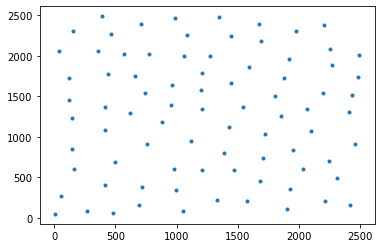

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lonely(p,X,r):
    m = X.shape[1]
    x0,y0 = p
    x = y = np.arange(-r,r)
    x = x + x0
    y = y + y0

    u,v = np.meshgrid(x,y)

    u[u < 0] = 0
    u[u >= m] = m-1
    v[v < 0] = 0
    v[v >= m] = m-1

    return not np.any(X[u[:],v[:]] > 0)

def generate_samples(m=2500,r=200,k=30):
    # m = extent of sample domain
    # r = minimum distance between points
    # k = samples before rejection
    active_list = []

    # step 0 - initialize n-d background grid
    X = np.ones((m,m))*-1

    # step 1 - select initial sample
    x0,y0 = np.random.randint(0,m), np.random.randint(0,m)
    active_list.append((x0,y0))
    X[active_list[0]] = 1

    # step 2 - iterate over active list
    while active_list:
        i = np.random.randint(0,len(active_list))
        rad = np.random.rand(k)*r+r
        theta = np.random.rand(k)*2*np.pi

        # get a list of random candidates within [r,2r] from the active point
        candidates = np.round((rad*np.cos(theta)+active_list[i][0], rad*np.sin(theta)+active_list[i][1])).astype(np.int32).T

        # trim the list based on boundaries of the array
        candidates = [(x,y) for x,y in candidates if x >= 0 and y >= 0 and x < m and y < m]

        for p in candidates:
            if X[p] < 0 and lonely(p,X,r):
                X[p] = 1
                active_list.append(p)
                break
        else:
            del active_list[i]

    return X

X = generate_samples(2500, 200, 10)
s = np.where(X>0)
plt.plot(s[0],s[1],'.')
plt.show()

x = np.array(s[0])
y = np.array(s[1])

df = pd.DataFrame({"x-axis" : x, "y-axis" : y})
df.to_csv("getcodes.csv", index=False)

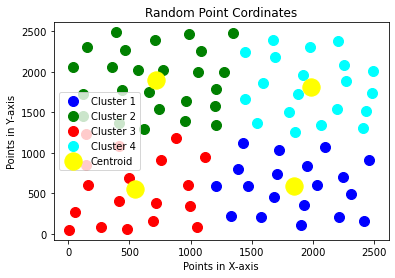

In [107]:
import numpy as np    
import matplotlib.pyplot as mtp    
import pandas as pd 
dataset = pd.read_csv('C:\\Users\\iasms\\anaconda3\\getcodes.csv') 
x = dataset.iloc[:, [0, 1]].values 
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

df['Cluster_Labels'] = kmeans.fit_predict(x)

mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Random Point Cordinates')  
mtp.xlabel('Points in X-axis')  
mtp.ylabel('Points in Y-axis')  
mtp.legend()  
mtp.show()

df.to_csv("clustered_labelled.csv", index=False)